<a href="https://colab.research.google.com/github/BeltranCristian/probabilidad/blob/main/ProyectoFinal/ProyectoFinal_CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final: Análisis Estadístico de Datos COVID-19 en Python

**Materia:** Probabilidad y Estadística  
**Grupo:** 2y
**Fecha de entrega:** 25/11/2025
**Integrantes:** Cristian  Beltran  
**Docente:** Jose Gabriel Rivas Rodriguez



In [8]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -q pyarrow gdown


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
ruta_drive = "/content/drive/MyDrive/ProyectoCOVID/covid2020-2021-codificado.csv"

file_id = "122bErTpAnP-3TZzIrSCFm4b16fTDfE0I"
ruta_gdown = "/content/covid2020-2021-codificado.csv"

modo_carga = 'drive'

if modo_carga == 'gdown':
    import gdown
    url = f"https://drive.google.com/uc?id={file_id}"
    print('Descargando con gdown:', url)
    gdown.download(url, ruta_gdown, quiet=False)
    ruta = ruta_gdown
else:
    ruta = ruta_drive

print('Ruta utilizada:', ruta)


Ruta utilizada: /content/drive/MyDrive/ProyectoCOVID/covid2020-2021-codificado.csv


In [10]:
import pandas as pd
import os

chunksize = 500_000

print('Leyendo en chunks...')
chunks = pd.read_csv(ruta, chunksize=chunksize, low_memory=False)
df = pd.concat(chunks, ignore_index=True)
print('Lectura completada. Filas:', len(df))
df.head()

Leyendo en chunks...
Lectura completada. Filas: 12634194


,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,...,DIABETES,EPOC,ASMA,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_ANTIGENO,UCI
0,Issste,Femenino,San Luis Potosí,Ambulatorio,2020-12-06,9999-99-99,No aplica,No,55,No,...,Si,No,No,No,No,No,No,No,Pendiente,No aplica
1,Issste,Masculino,San Luis Potosí,Ambulatorio,2020-02-20,9999-99-99,No aplica,No,59,No aplica,...,No,No,No,No,No,No,No,No,Pendiente,No aplica
2,Ssa,Femenino,Jalisco,Ambulatorio,2020-04-22,9999-99-99,No aplica,No,42,No,...,No,No,Si,No,No,No,No,No,Pendiente,No aplica
3,Ssa,Masculino,Chihuahua,Ambulatorio,2020-07-28,9999-99-99,No aplica,No,35,No aplica,...,No,No,No,No,No,No,No,No,Pendiente,No aplica
4,Ssa,Masculino,Ciudad De México,Ambulatorio,2020-08-18,9999-99-99,No aplica,No,51,No aplica,...,No,No,No,Si,No,No,No,No,Pendiente,No aplica


In [11]:
df.columns = [c.strip() for c in df.columns]
print('Columnas:', df.columns.tolist())




Columnas: ['SECTOR', 'SEXO', 'ENTIDAD_NAC', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'RESULTADO_ANTIGENO', 'UCI']


In [12]:

try:
    print('Conteo por RESULTADO:')
    print(df['RESULTADO'].value_counts(dropna=False))
except Exception as e:
    print('Ajusta el nombre de la columna RESULTADO en el dataset. Error:', e)

try:
    print('\nConteo por TIPO_PACIENTE:')
    print(df['TIPO_PACIENTE'].value_counts(dropna=False))
except:
    print('Ajusta la columna de tipo de paciente.')

if 'EMBARAZO' in df.columns:
    print('\nNúmero de pacientes embarazadas:', df['EMBARAZO'].value_counts().get(1, 0))
else:
    print('\nColumna EMBARAZO no encontrada, revisa nombres de columnas.')

if 'INDIGENA' in df.columns:
    print('\nNúmero de pacientes indígenas:', df['INDIGENA'].value_counts().get(1, 0))
else:
    print('\nColumna INDIGENA no encontrada, revisa nombres de columnas.')

Conteo por RESULTADO:
Ajusta el nombre de la columna RESULTADO en el dataset. Error: 'RESULTADO'

Conteo por TIPO_PACIENTE:
TIPO_PACIENTE
Ambulatorio      11543303
Hospitalizado     1090891
Name: count, dtype: int64

Número de pacientes embarazadas: 5985456

Número de pacientes indígenas: 167182


/tmp/ipython-input-1065169321.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('\nNúmero de pacientes embarazadas:', df['EMBARAZO'].value_counts().get(1, 0))
/tmp/ipython-input-1065169321.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('\nNúmero de pacientes indígenas:', df['INDIGENA'].value_counts().get(1, 0))


Columna ENTIDAD_RES no encontrada.


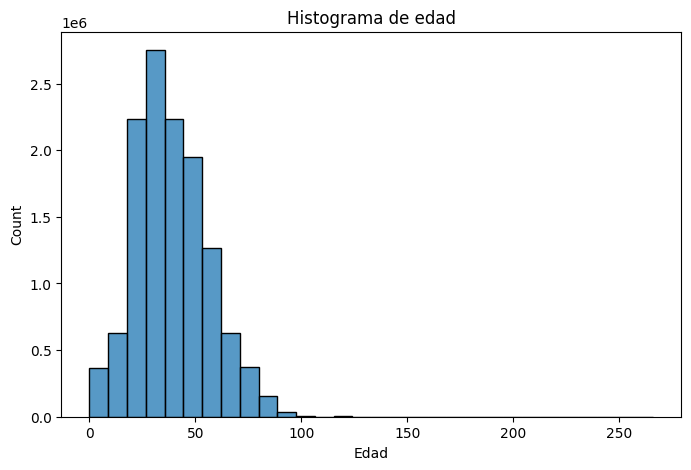

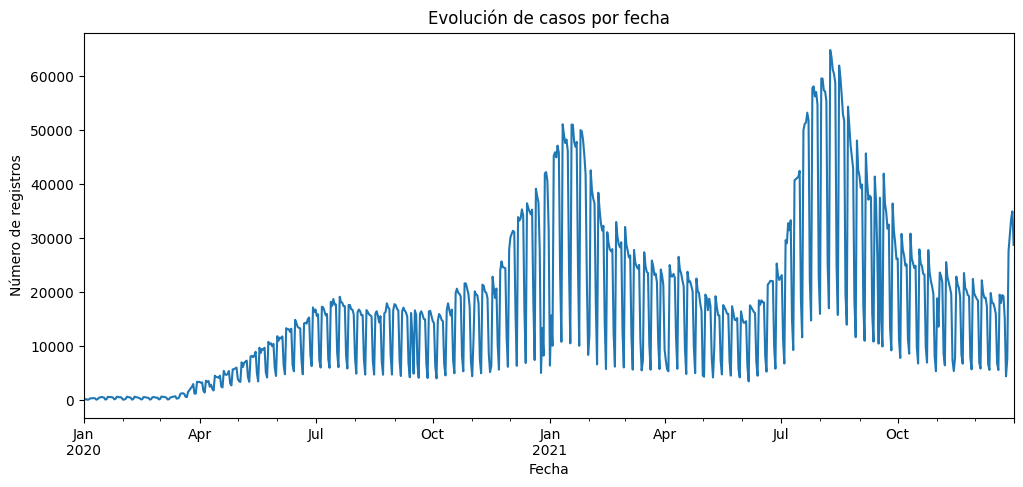

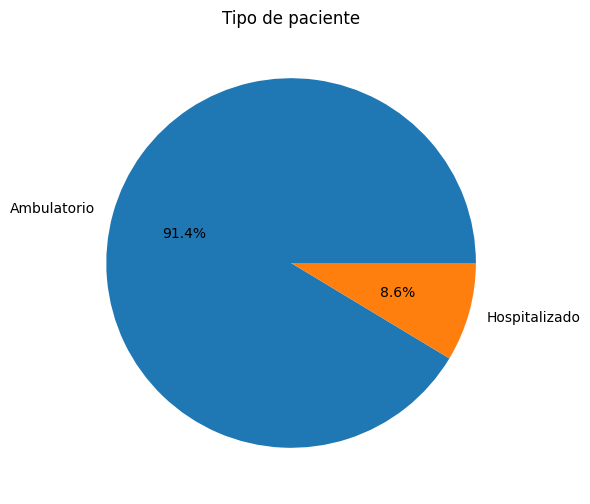

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'ENTIDAD_RES' in df.columns:
    top_states = df['ENTIDAD_RES'].value_counts().head(30)
    plt.figure(figsize=(10,8))
    sns.barplot(x=top_states.values, y=top_states.index)
    plt.title('Casos por entidad (top 30)')
    plt.xlabel('Número de casos')
    plt.ylabel('Entidad')
    plt.tight_layout()
    plt.show()
else:
    print('Columna ENTIDAD_RES no encontrada.')

if 'EDAD' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['EDAD'].dropna(), bins=30)
    plt.title('Histograma de edad')
    plt.xlabel('Edad')
    plt.show()
else:
    print('Columna EDAD no encontrada.')

if 'FECHA_INGRESO' in df.columns:
    df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'], errors='coerce')
    series_fecha = df.groupby('FECHA_INGRESO').size().sort_index()
    plt.figure(figsize=(12,5))
    series_fecha.plot()
    plt.title('Evolución de casos por fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Número de registros')
    plt.show()
else:
    print('Columna FECHA_INGRESO no encontrada.')

if 'TIPO_PACIENTE' in df.columns:
    tipo_counts = df['TIPO_PACIENTE'].value_counts()
    plt.figure(figsize=(6,6))
    tipo_counts.plot.pie(autopct='%1.1f%%')
    plt.title('Tipo de paciente')
    plt.ylabel('')
    plt.show()
else:
    print('Columna TIPO_PACIENTE no encontrada.')


In [16]:
if 'SEXO' in df.columns and 'RESULTADO' in df.columns:
    tabla = pd.crosstab(df['SEXO'], df['RESULTADO'])
    tabla.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title('Resultado por sexo')
    plt.xlabel('Sexo')
    plt.ylabel('Número de casos')
    plt.show()
else:
    print('Columnas SEXO y/o RESULTADO no encontradas.')


Columnas SEXO y/o RESULTADO no encontradas.


In [22]:
comor = ['DIABETES','HIPERTENSION','OBESIDAD','EPOC','ASMA','INMUSUPR','RENAL_CRONICA','CARDIOVASCULAR','TABAQUISMO']

for c in comor:
    if c in df.columns:
        df[c] = df[c].astype(str).str.upper().str.strip()
        df[c] = df[c].replace({
            "SI": 1,
            "NO": 0,
            "1": 1,
            "0": 0
        })
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)


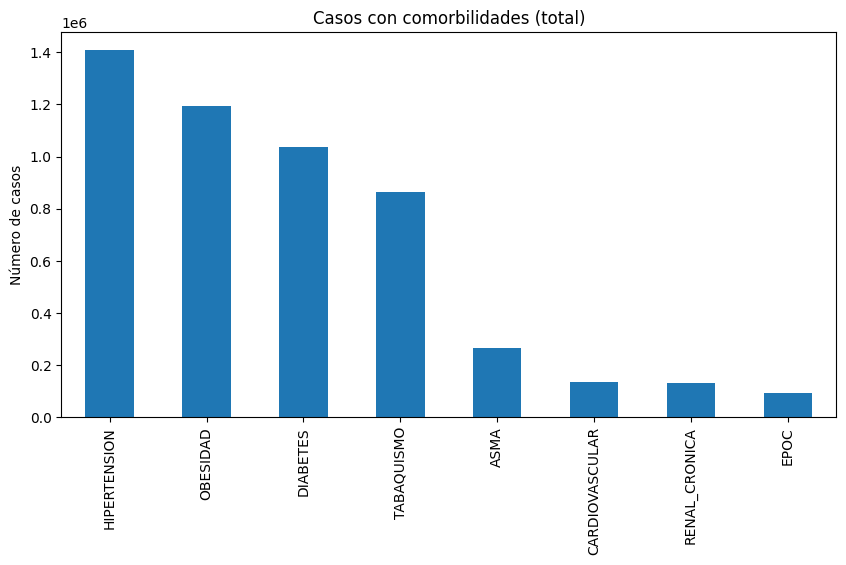

In [23]:
comor = ['DIABETES','HIPERTENSION','OBESIDAD','EPOC','ASMA','INMUSUPR','RENAL_CRONICA','CARDIOVASCULAR','TABAQUISMO']
present = [c for c in comor if c in df.columns]
if present:
    counts = {c: df[c].fillna(0).astype(int).sum() for c in present}
    pd.Series(counts).sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
    plt.title('Casos con comorbilidades (total)')
    plt.ylabel('Número de casos')
    plt.show()
else:
    print('No se encontraron columnas de comorbilidades esperadas:', com)


In [25]:
total = len(df)
print(f"Total de registros: {total}")

for c in present:
    total_c = df[c].eq('Sí').astype(int).sum()
    prob_simple = total_c / total
    print(f"Comorbilidad ({c}): total={total_c}, prob_simple={prob_simple:.4f}")


if 'ENTIDAD_RES' in df.columns:
    entidad_table = df.groupby('ENTIDAD_RES').size().sum()
    entidad_totales = df['ENTIDAD_RES'].value_counts()

    entidad_prob = entidad_table.div(entidad_totales, axis=0)

    display(entidad_prob.head())

else:
    print("ENTIDAD_RES no encontrada; no se calcularon probabilidades condicionales por entidad.")


Total de registros: 12634194
Comorbilidad (DIABETES): total=0, prob_simple=0.0000
Comorbilidad (HIPERTENSION): total=0, prob_simple=0.0000
Comorbilidad (OBESIDAD): total=0, prob_simple=0.0000
Comorbilidad (EPOC): total=0, prob_simple=0.0000
Comorbilidad (ASMA): total=0, prob_simple=0.0000
Comorbilidad (RENAL_CRONICA): total=0, prob_simple=0.0000
Comorbilidad (CARDIOVASCULAR): total=0, prob_simple=0.0000
Comorbilidad (TABAQUISMO): total=0, prob_simple=0.0000
ENTIDAD_RES no encontrada; no se calcularon probabilidades condicionales por entidad.


In [20]:
import scipy.stats as stats

media = 2360
sigma = 714
p = stats.norm.cdf(3000, loc=media, scale=sigma) - stats.norm.cdf(2000, loc=media, scale=sigma)
print(f'P(2000 <= X <= 3000) = {p:.4f}')


P(2000 <= X <= 3000) = 0.5079


## Interpretación general de resultados

Los datos analizados permiten observar el comportamiento de los casos de COVID-19 durante los años 2020 y 2021 en México. En primer lugar, la estadística descriptiva muestra una alta concentración de casos positivos en determinadas entidades, lo cual refleja diferencias regionales en la propagación del virus, el acceso a pruebas y la capacidad hospitalaria. El histograma de edades indica que la mayoría de los casos se concentra en adultos jóvenes y adultos medios, aunque también se observan registros en todas las edades. El análisis por tipo de paciente evidencia que la mayoría fueron atendidos de manera ambulatoria, lo que coincide con la política general de reservar hospitalización para casos graves.


## Conclusiones personales

Integrante: Cristian Beltrán

Durante la realización de este proyecto aprendí a aplicar conceptos de probabilidad y estadística utilizando Python, especialmente con herramientas como pandas, matplotlib y seaborn. Trabajar con un archivo tan grande me permitió comprender la importancia de optimizar la carga de datos usando técnicas como “chunks” y el uso de Google Drive para manejar archivos pesados en Colab. También reforcé mi habilidad para interpretar datos reales, identificar patrones en gráficos y calcular probabilidades útiles para el análisis de salud pública.
En general, este proyecto me ayudó a conectar la teoría vista en clase con un caso práctico de gran relevancia y a sentirme más seguro usando Python para análisis estadístico profesional.

In [ ]:
print('Notebook listo. Guarda en GitHub para habilitar el badge Open in Colab.')